In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk import punkt
import pickle

In [2]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, precision_score, recall_score
from keras.preprocessing import text, sequence
from keras.layers import Embedding
from keras import layers, models, optimizers
import tensorflow as tf

In [3]:
tf.compat.v1.disable_eager_execution()

In [4]:
df_main = pd.read_csv('df_main.csv')

In [5]:
df_sincere = df_main.loc[df_main['target'] == 0]
df_insincere = df_main.loc[df_main['target'] == 1]

In [6]:
df_sincere_sampled = df_sincere.sample(20000,random_state=42)
df_insincere_sampled = df_insincere.sample(20000,random_state=42)


In [7]:
df_sincere_sampled.shape

(20000, 3)

In [8]:
df_main = pd.concat([df_insincere_sampled,df_sincere_sampled])

In [9]:
df_main.shape

(40000, 3)

In [10]:
df_train, df_test = train_test_split(df_main,train_size = 0.80,random_state=24)

In [11]:
y_train = df_train['target']

In [12]:
y_test = df_test['target']

In [13]:
len(y_test)

8000

In [14]:
# load elmo_train_new
pickle_in_train = open("elmo_train_20k_24.pickle", "rb")
elmo_train_new = pickle.load(pickle_in_train)

# load elmo_train_new
pickle_in_test = open("elmo_test_20k_24.pickle", "rb")
elmo_test_new = pickle.load(pickle_in_test)

In [15]:

# fit xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [16]:
clf = LogisticRegression(n_jobs = 3)

In [17]:
clf.fit(elmo_train_new,y_train)

LogisticRegression(n_jobs=3)

In [18]:
# make predictions for test data
y_pred = clf.predict(elmo_test_new)
predictions = [round(value) for value in y_pred]
# make predictions for test data


In [19]:
print(predictions)

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 

In [20]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

Accuracy: 88.188%


In [21]:
print(f1_score(predictions, y_test))

0.8823016564952048


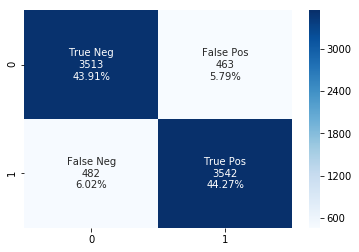

In [22]:
cf_matrix = confusion_matrix(predictions, y_test)

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


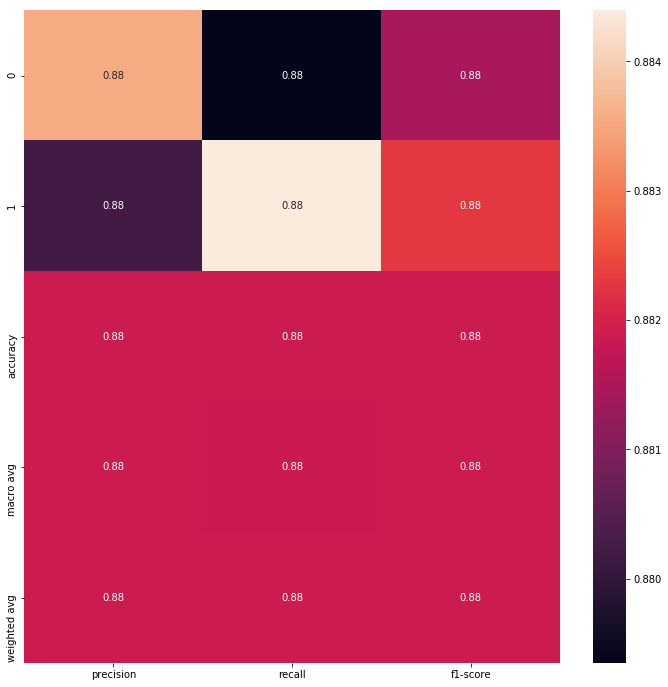

In [23]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test,
                                   predictions,
                                   labels=[0,1],
                                   output_dict=True)

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,ax=ax,square = False)